In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1479,2020-08-31,United Kingdom,334116.0,334467.0,41541.0,41499.0,-351.0,42.0
1480,2020-08-31,Germany,243133.0,242381.0,9302.0,9298.0,752.0,4.0
1481,2020-08-31,Iran,375957.0,373570.0,21617.0,21462.0,2387.0,155.0
1482,2020-08-31,Turkey,268320.0,268546.0,6313.0,6326.0,-226.0,-13.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  7802.4939353099735
RMSE =  30602.32875164217


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  299.69676549865227
RMSE =  736.4165530612695


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  54549.48936170213
RMSE =  96078.20494718009
-- World performances for deaths --
MAE =  1674.212765957447
RMSE =  2048.094128765494


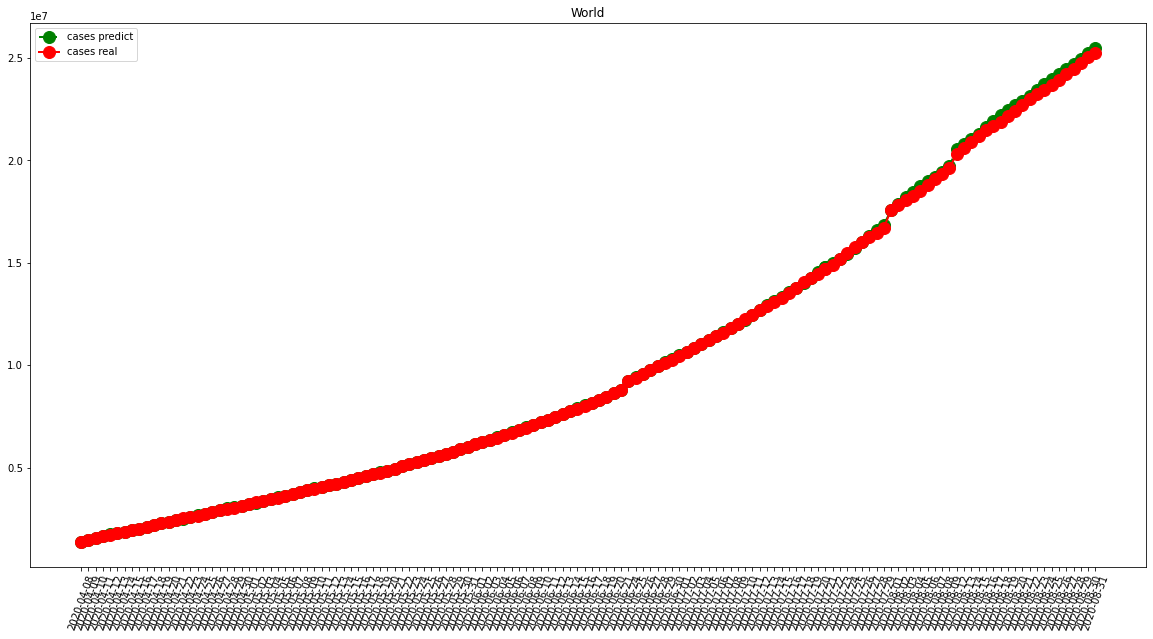

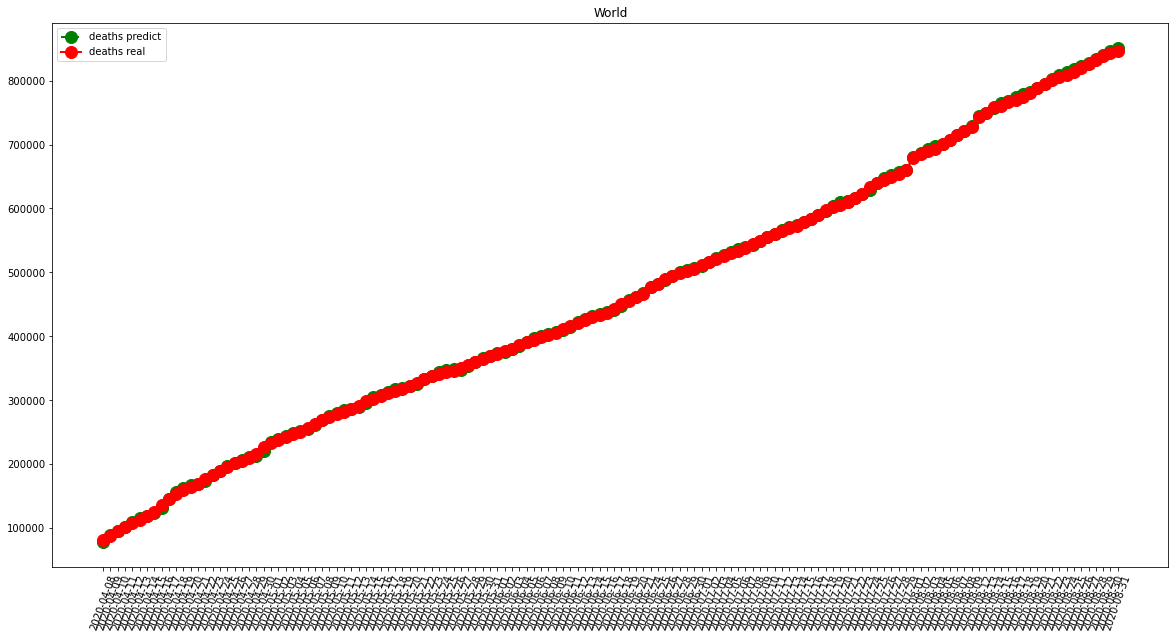

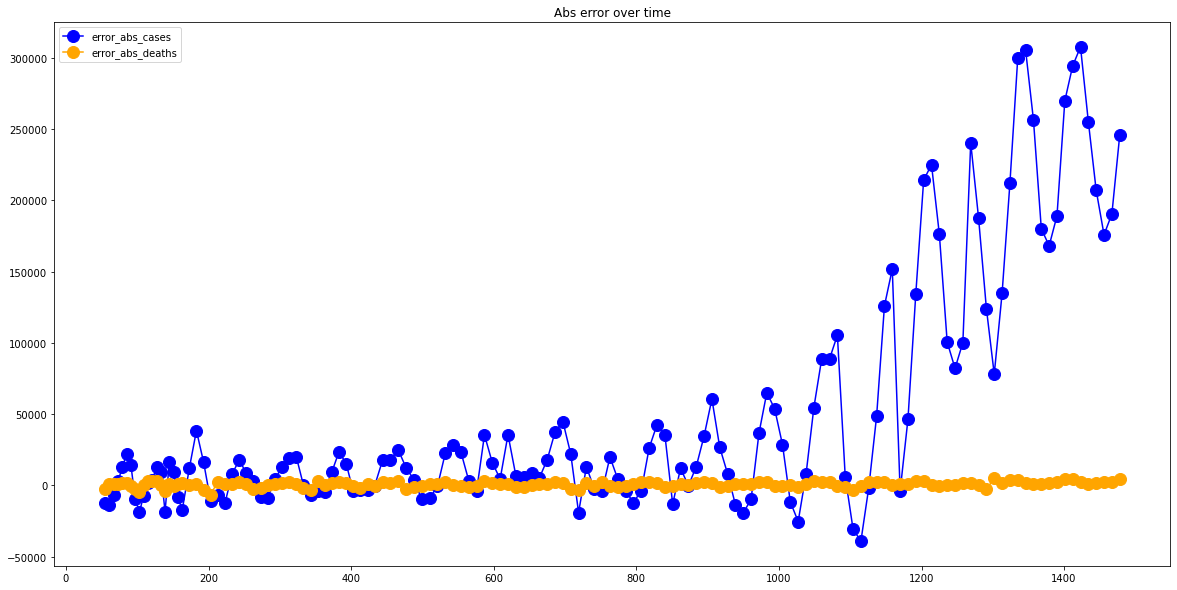

In [7]:
visShow("World")

-- France performances for cases --
MAE =  965.6092715231788
RMSE =  1457.9970543852367
-- France performances for deaths --
MAE =  123.57615894039735
RMSE =  272.955227631549


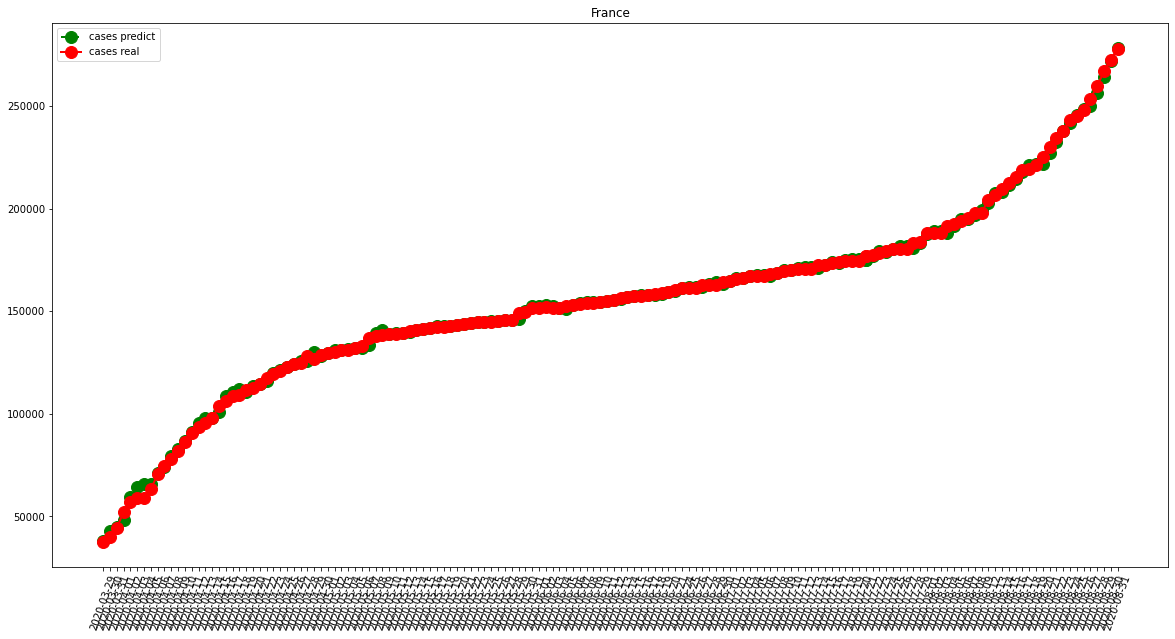

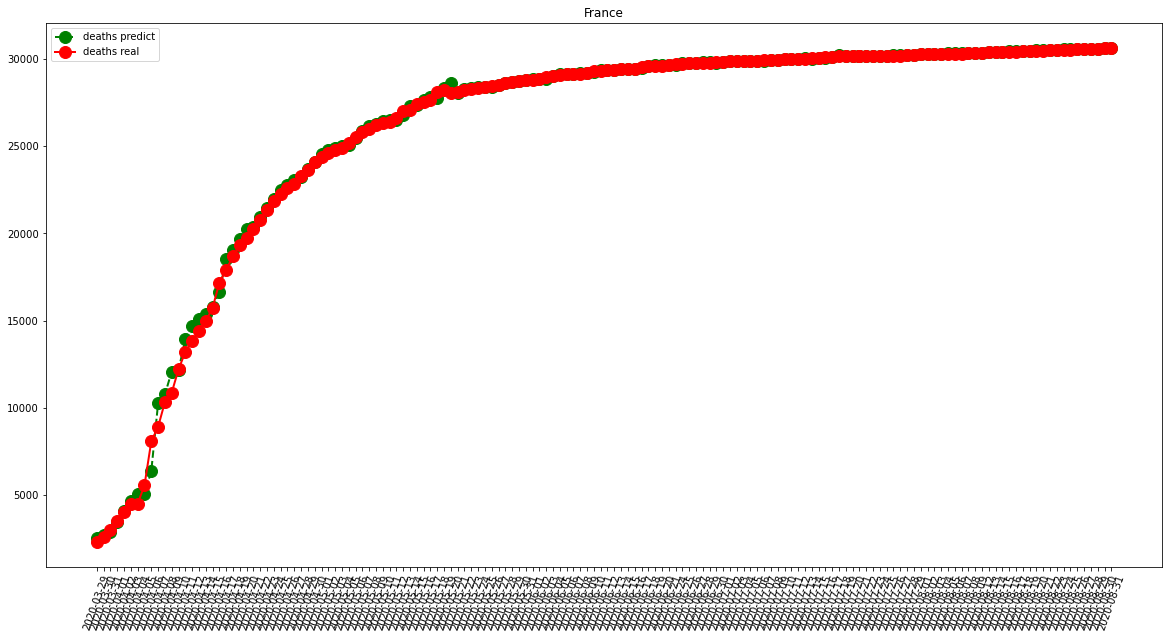

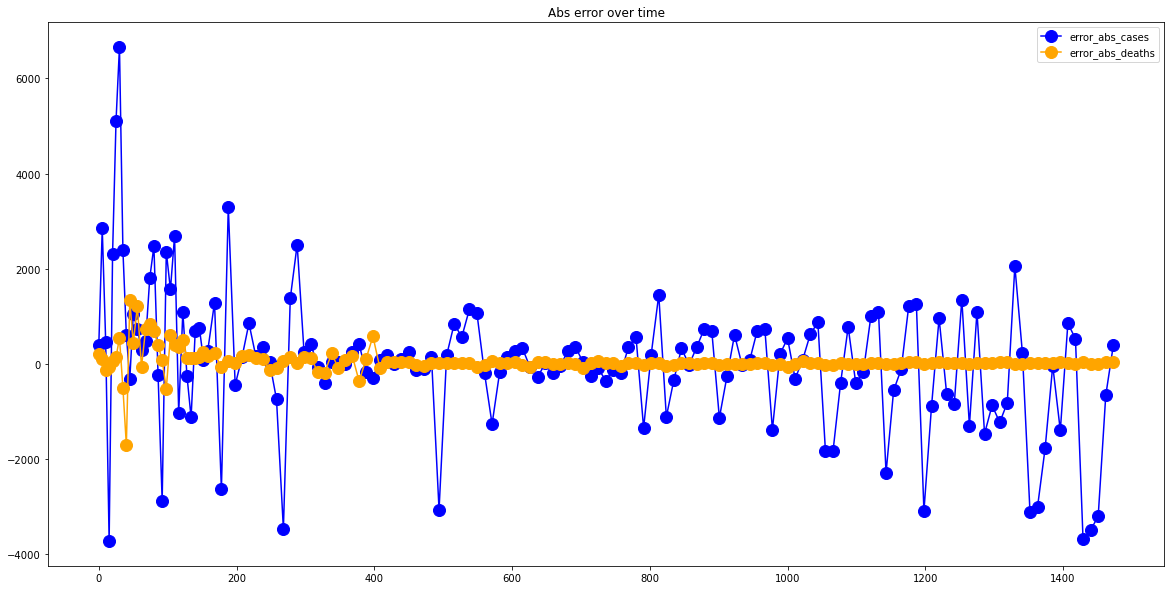

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  302.10596026490066
RMSE =  456.4274892906128
-- Italy performances for deaths --
MAE =  73.63576158940397
RMSE =  241.5669734235345


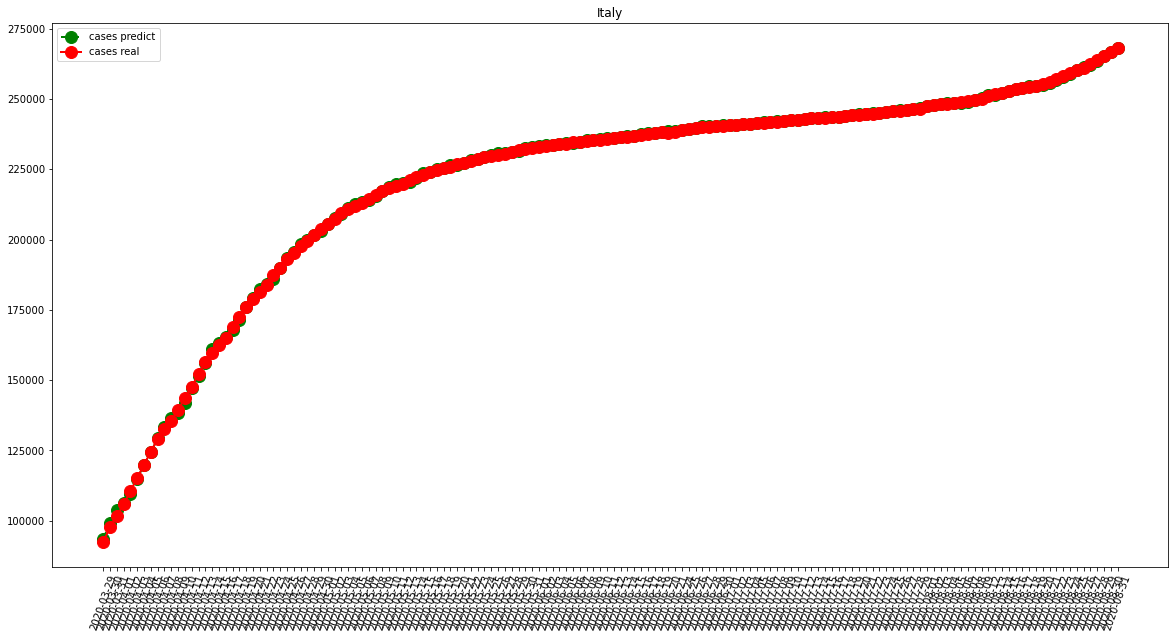

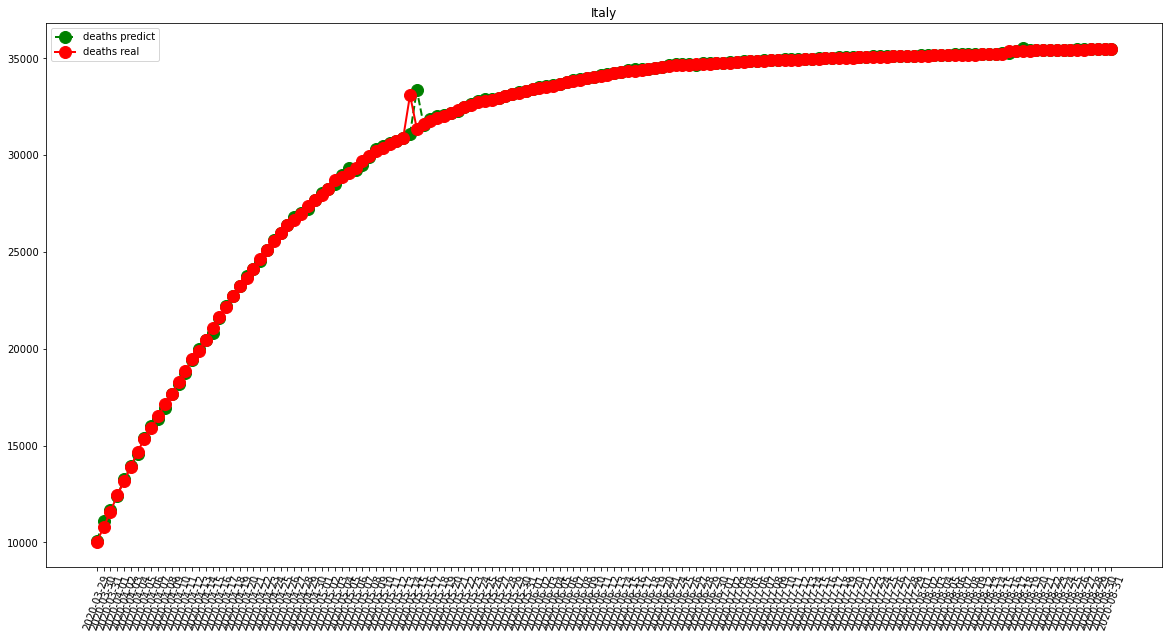

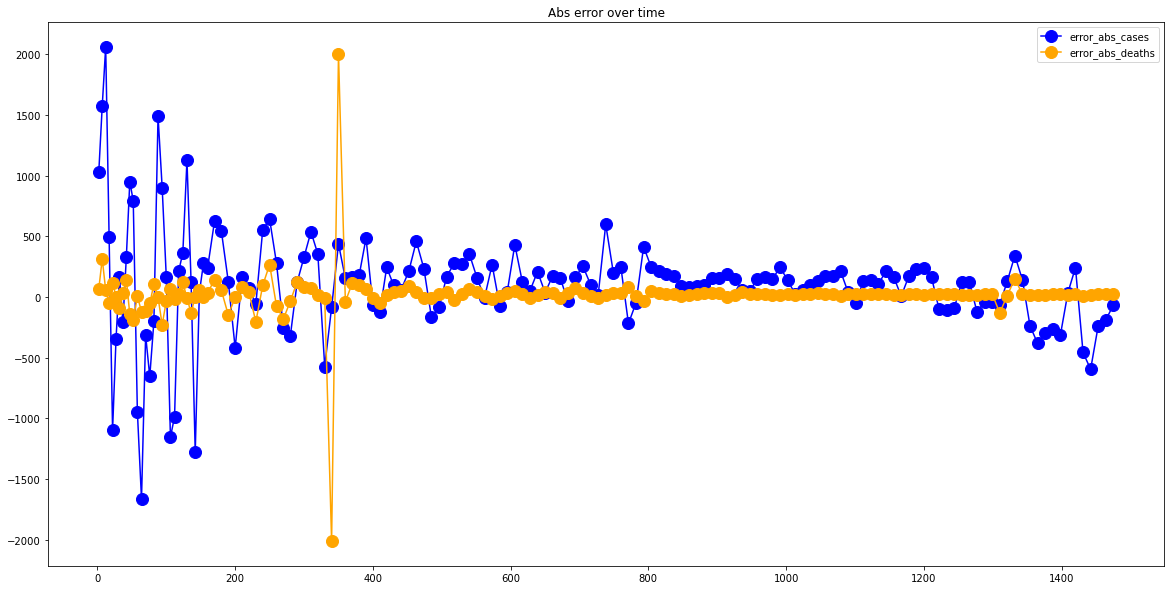

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  1808.708609271523
RMSE =  3400.772303209691
-- Spain performances for deaths --
MAE =  126.69536423841059
RMSE =  330.64144962772065


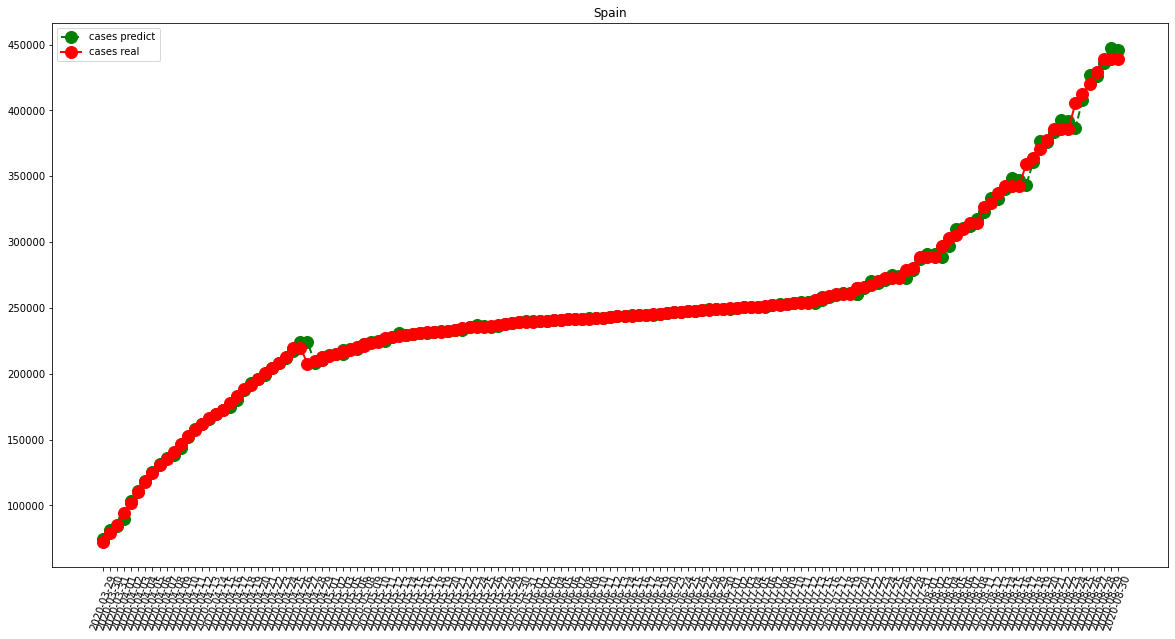

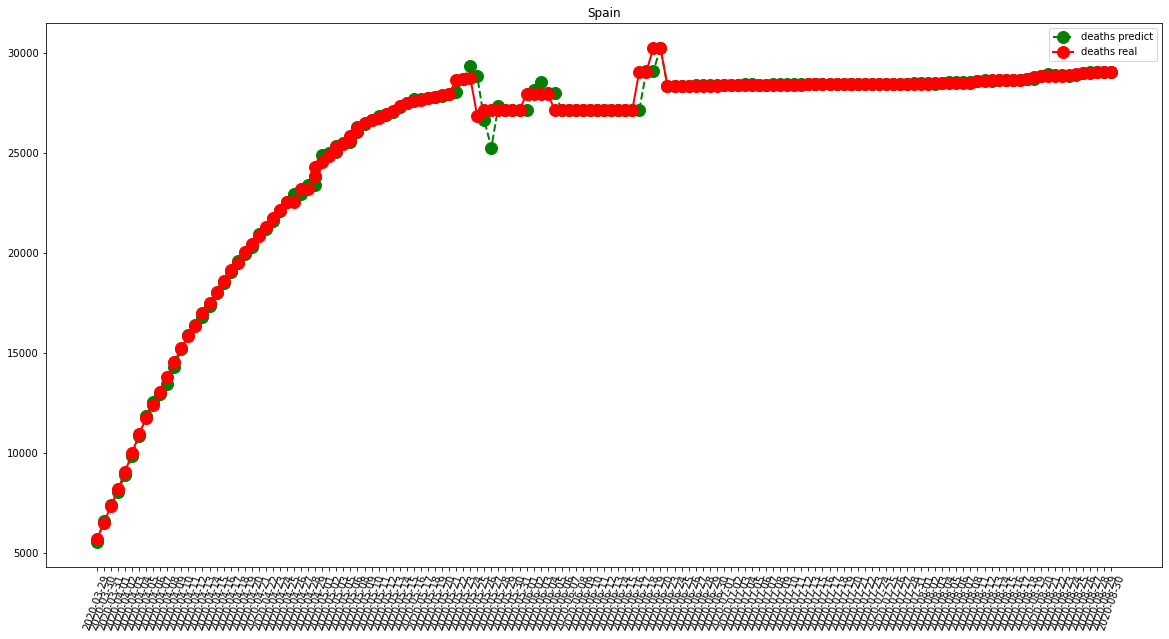

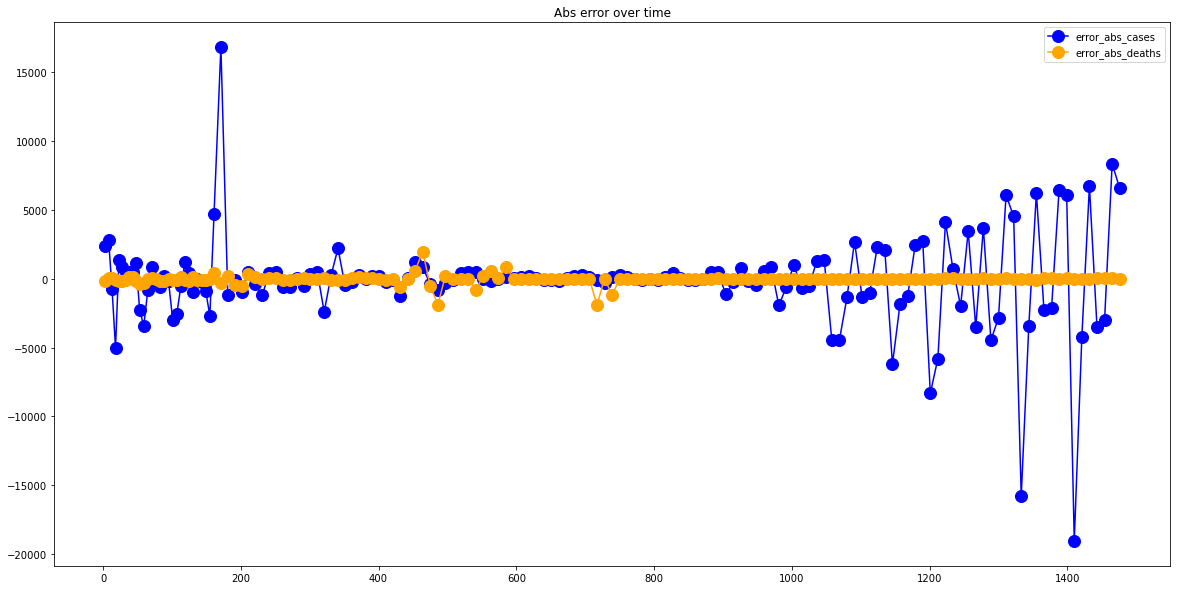

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  11788.264900662252
RMSE =  18417.219016578907
-- United States performances for deaths --
MAE =  489.6291390728477
RMSE =  692.9189148208875


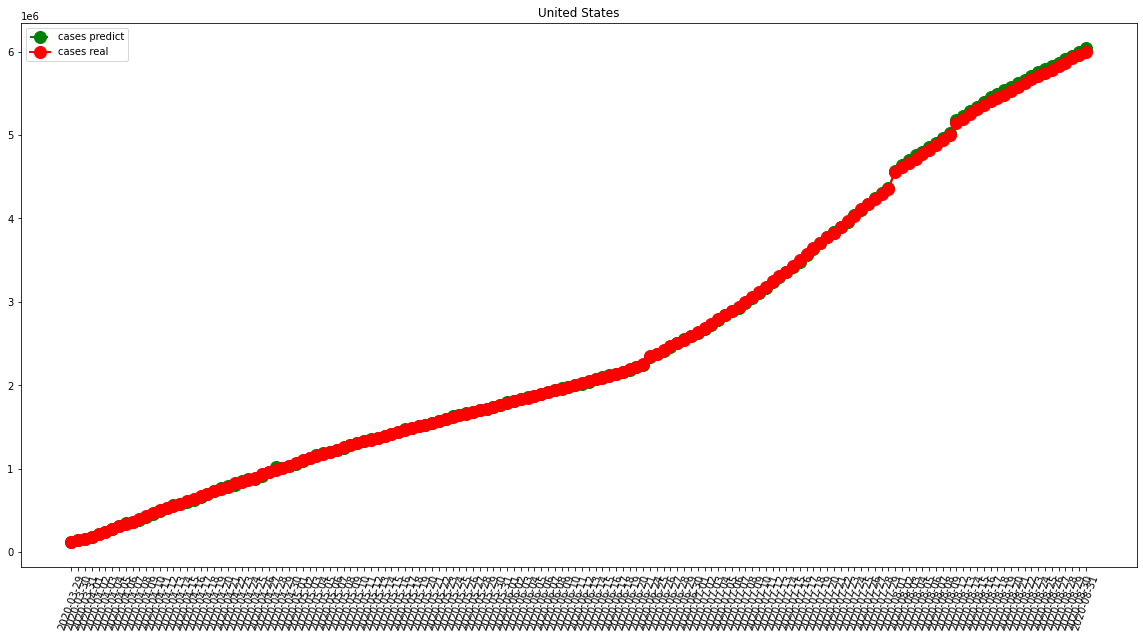

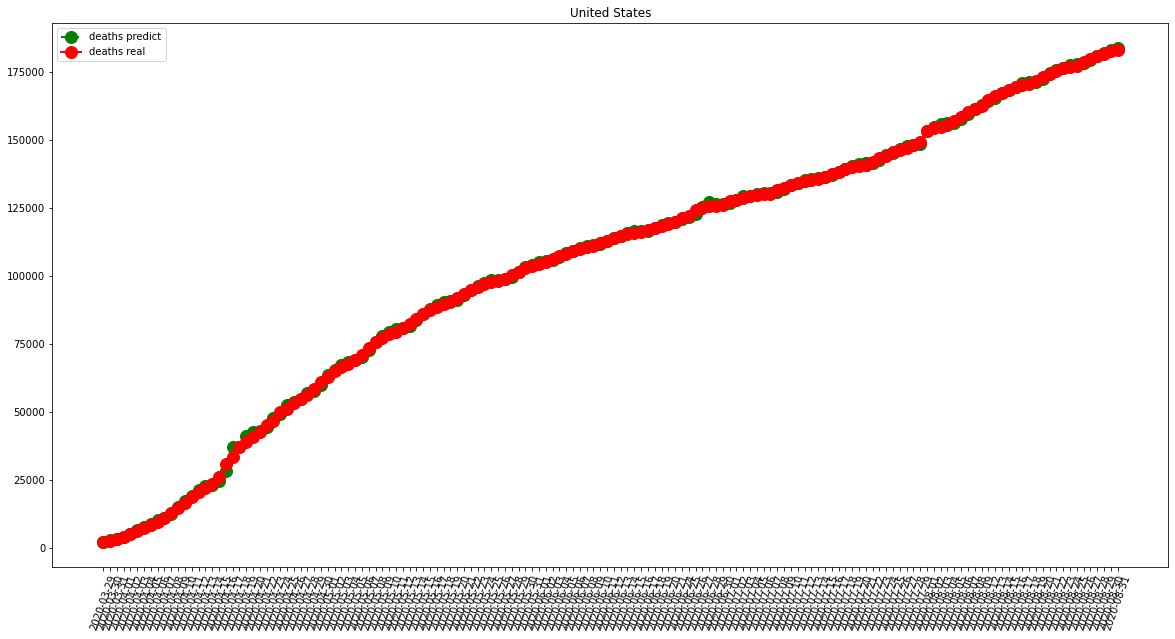

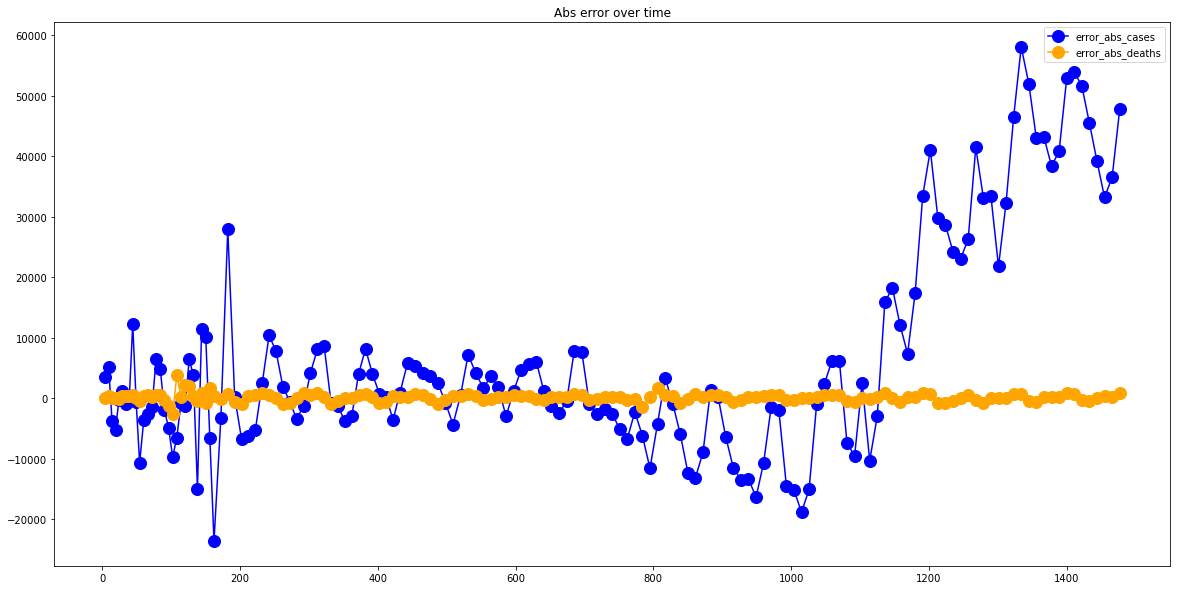

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  66.13245033112582
RMSE =  97.09256865186552
-- China performances for deaths --
MAE =  27.56291390728477
RMSE =  127.7815810292357


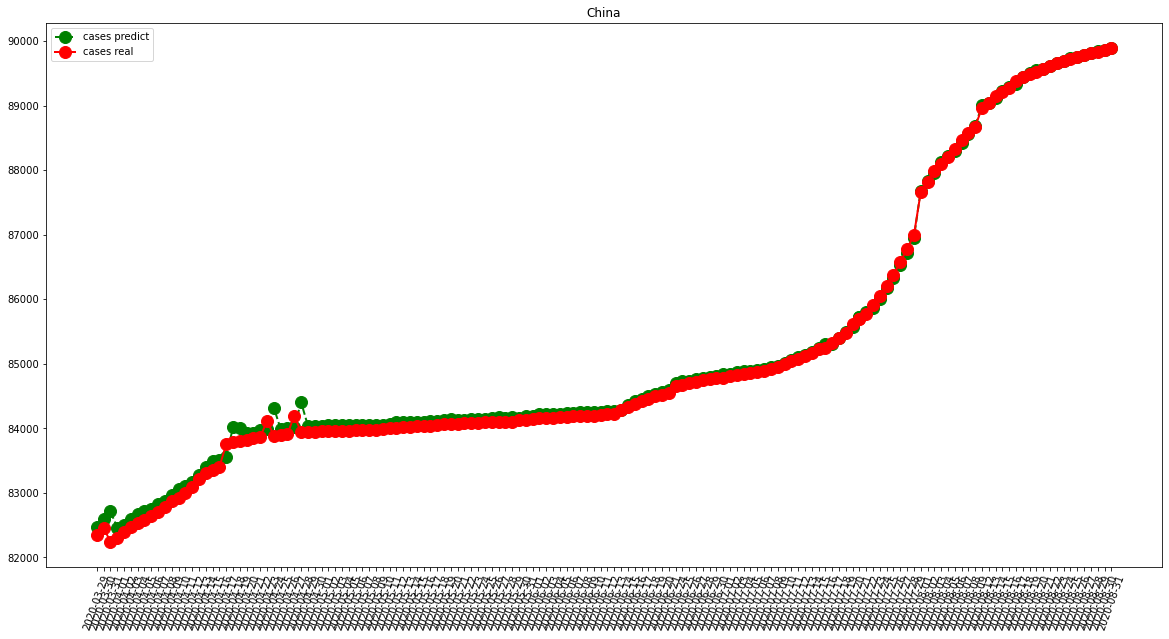

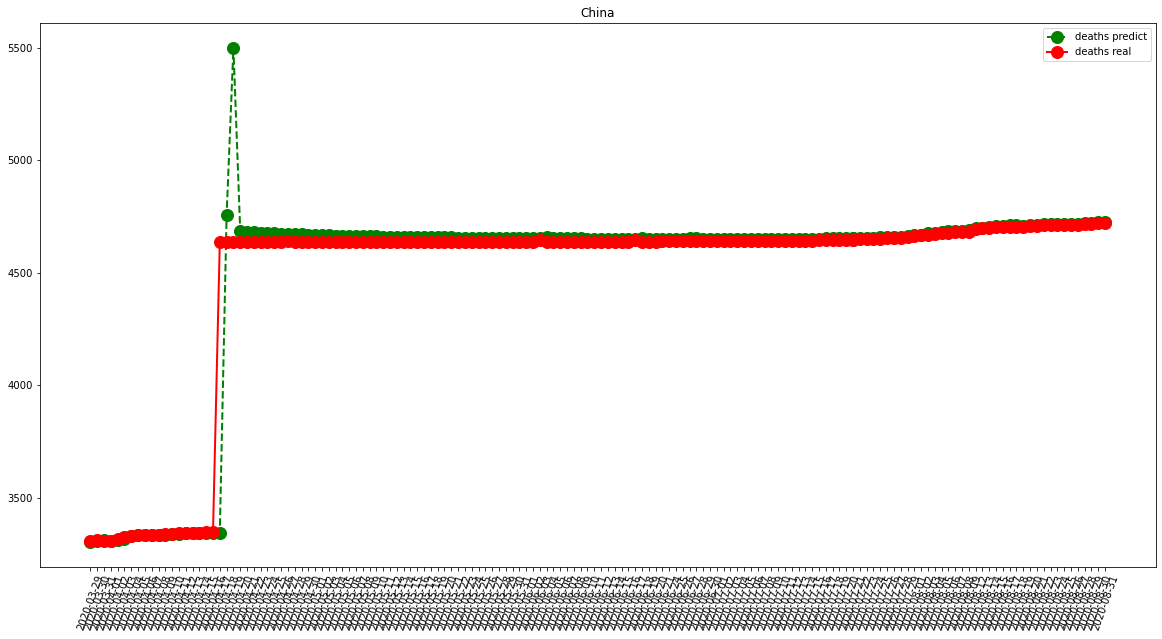

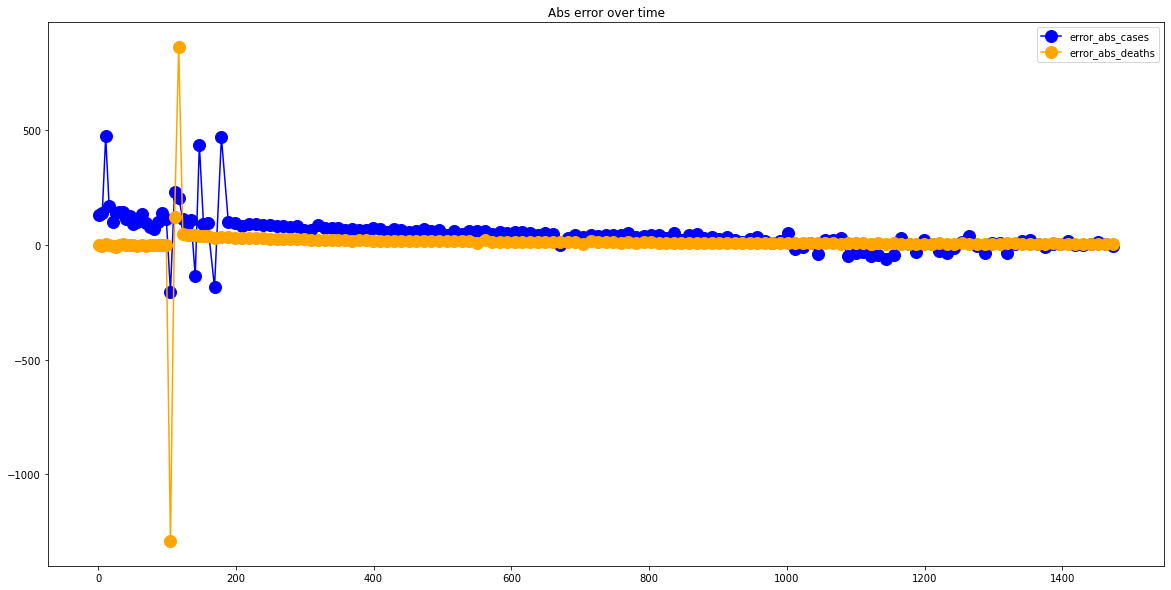

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1066.5772357723577
RMSE =  3770.1417184551265
-- United Kingdom performances for deaths --
MAE =  245.4959349593496
RMSE =  769.4853522433505


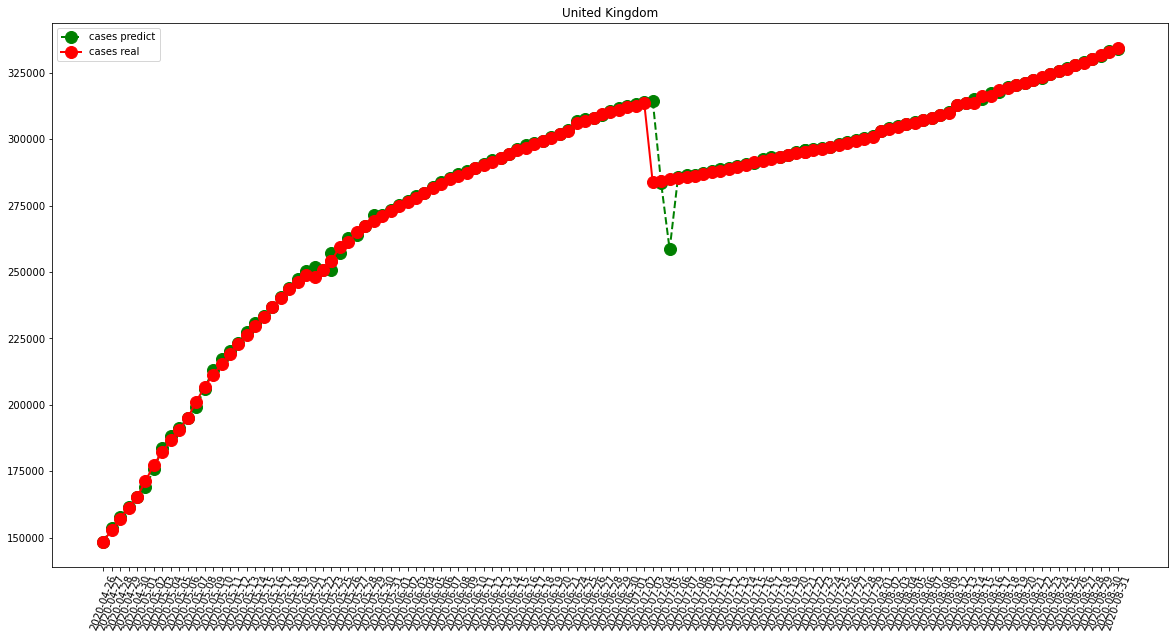

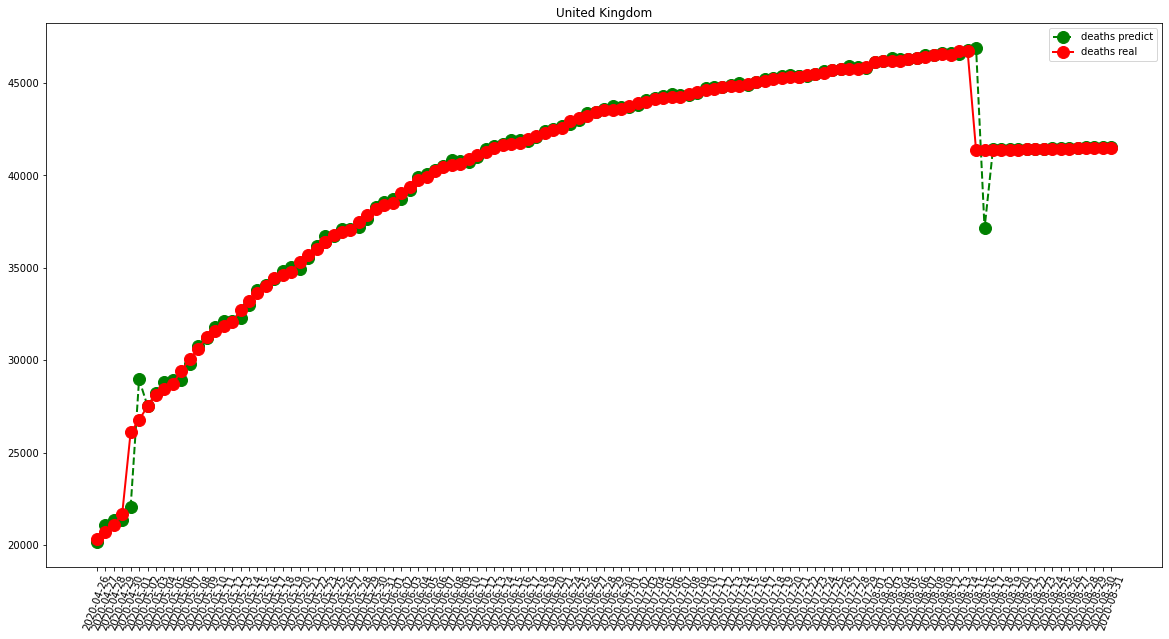

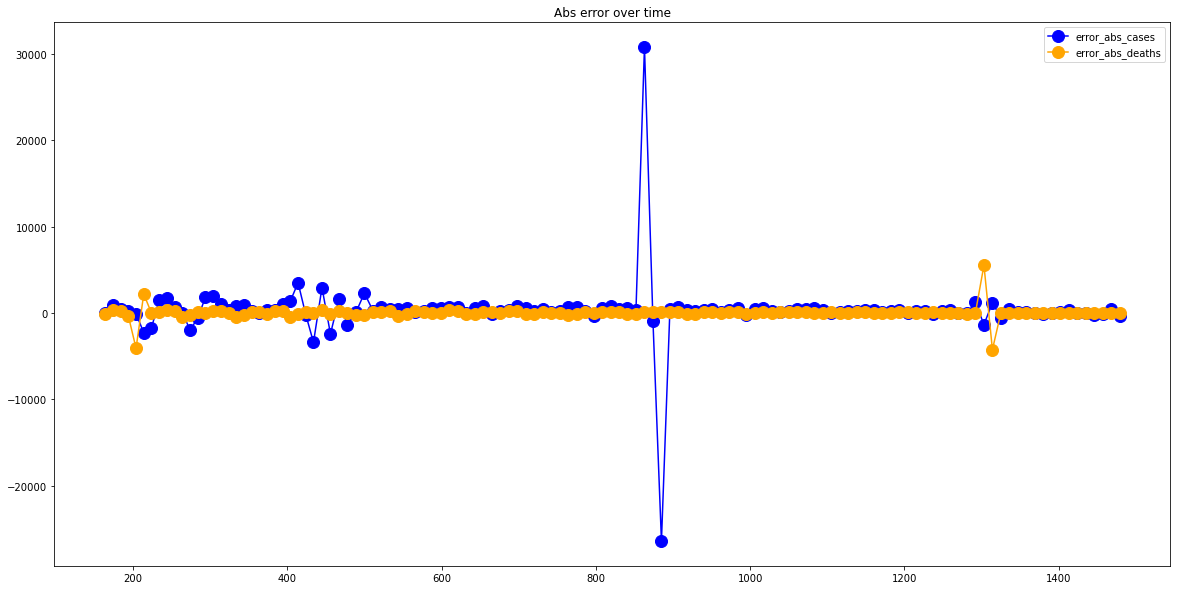

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  399.7235772357724
RMSE =  585.3550378404574
-- Germany performances for deaths --
MAE =  21.15447154471545
RMSE =  39.62055802088329


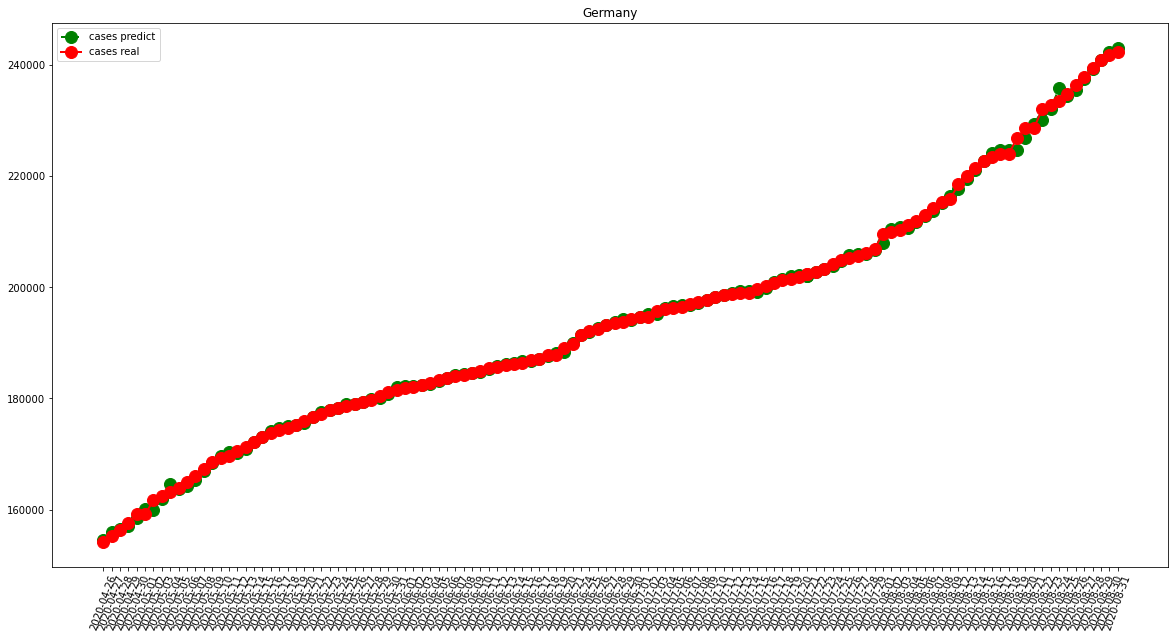

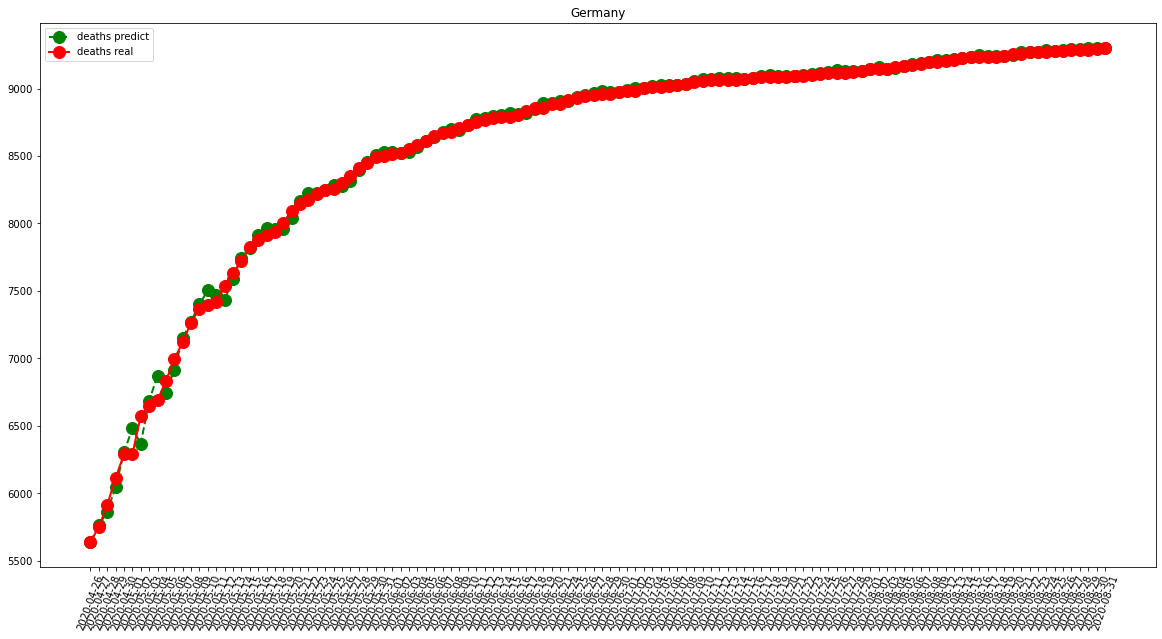

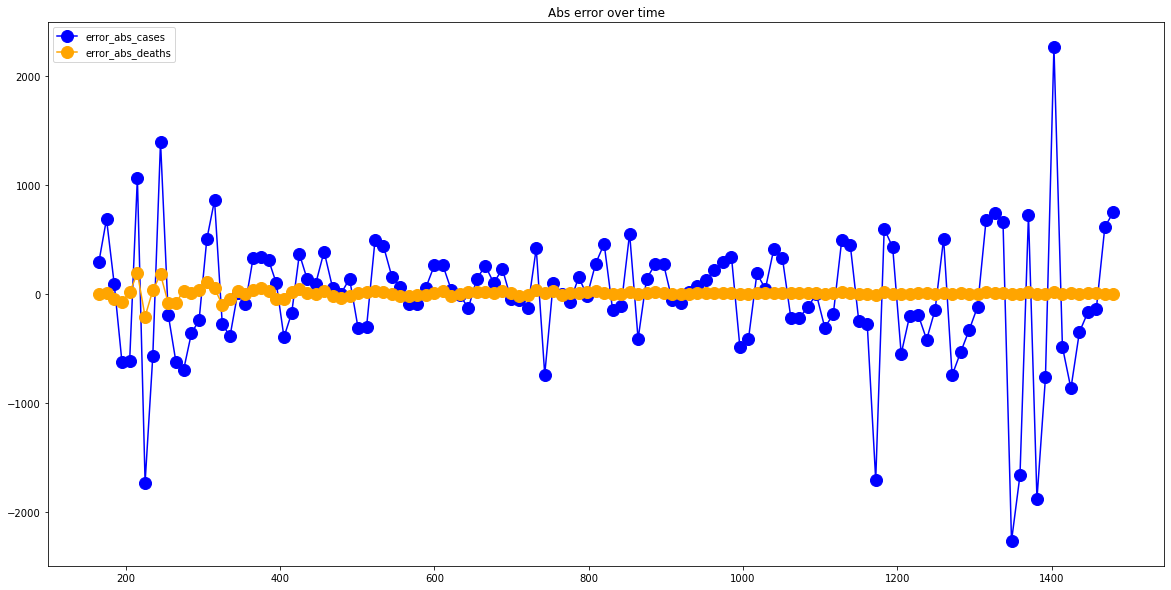

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  775.1788617886178
RMSE =  1143.65283051631
-- Iran performances for deaths --
MAE =  43.764227642276424
RMSE =  81.43584436823554


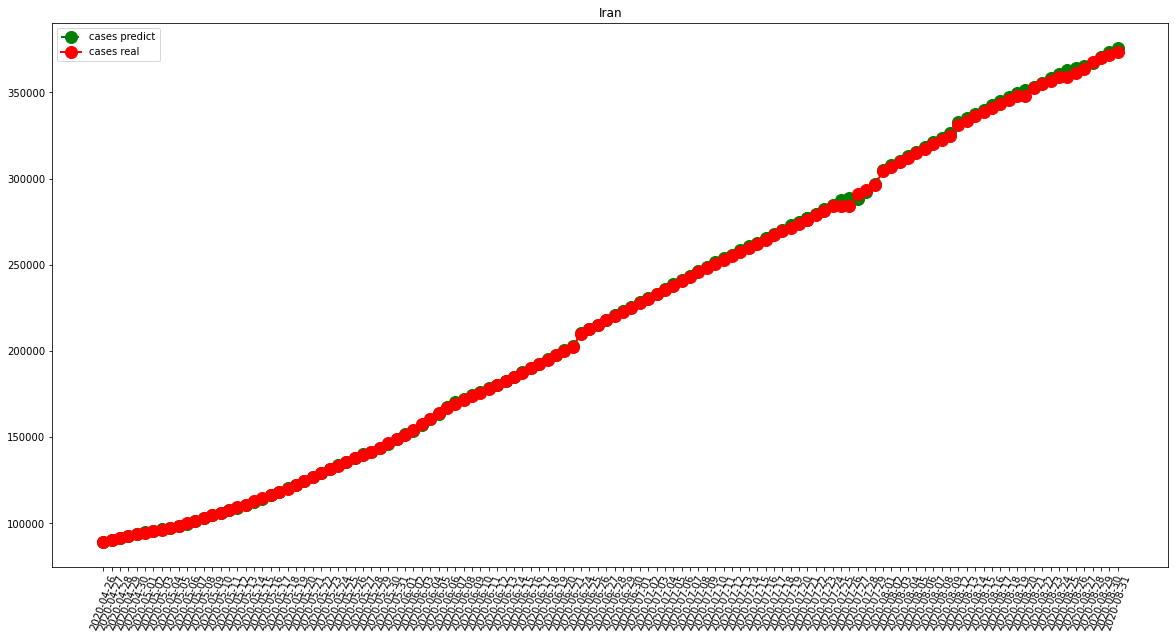

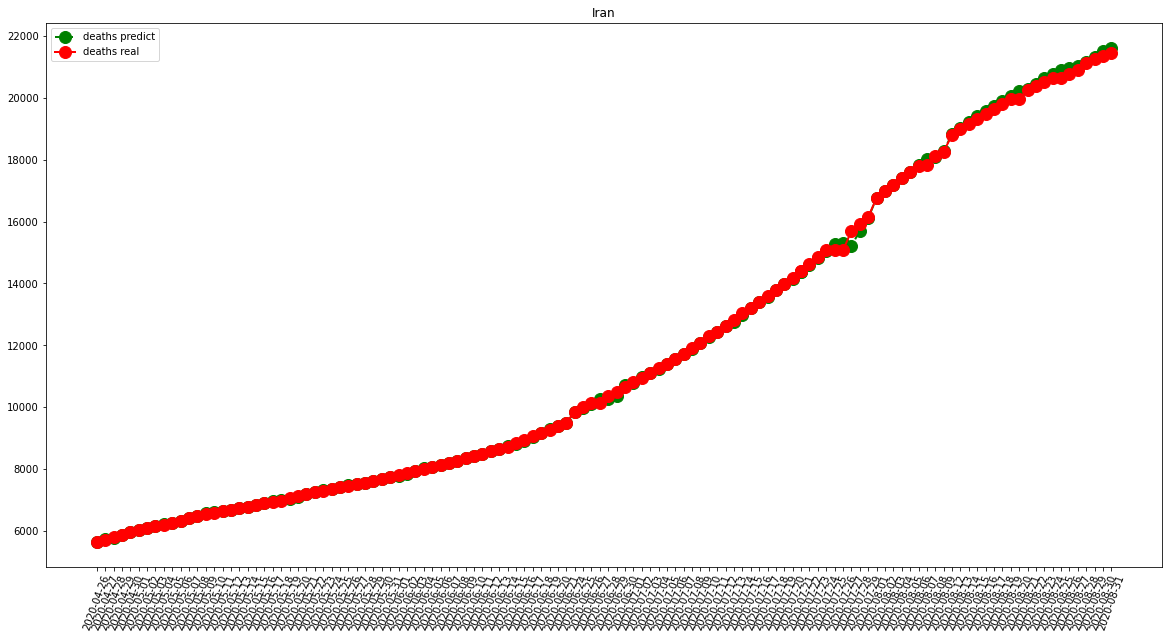

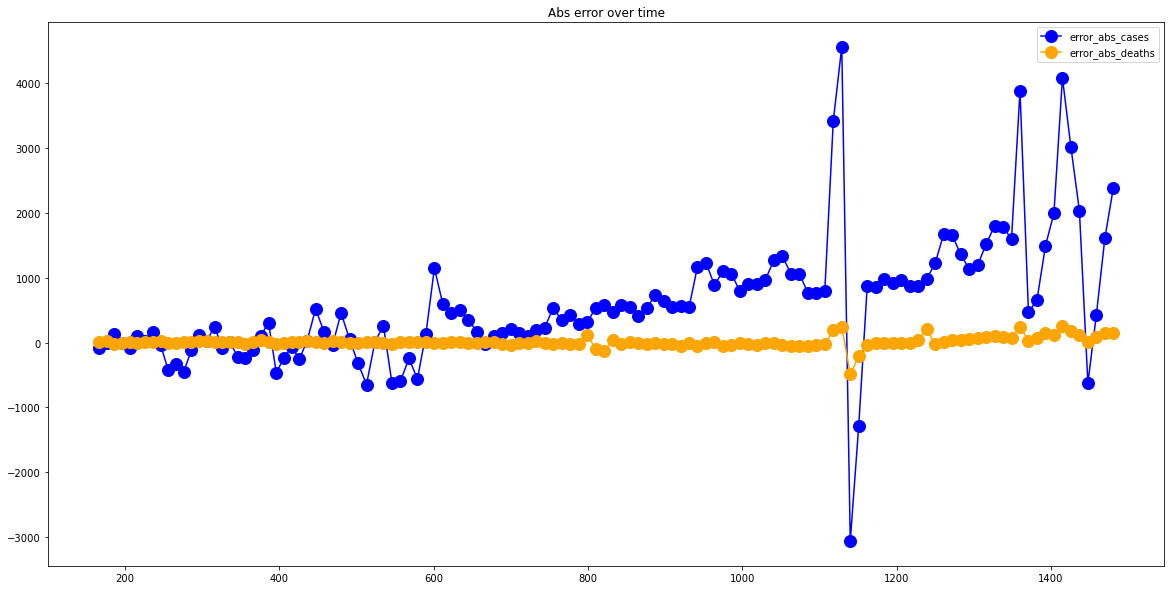

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  201.26829268292684
RMSE =  326.2863473818739
-- Turkey performances for deaths --
MAE =  16.357723577235774
RMSE =  91.58016613474935


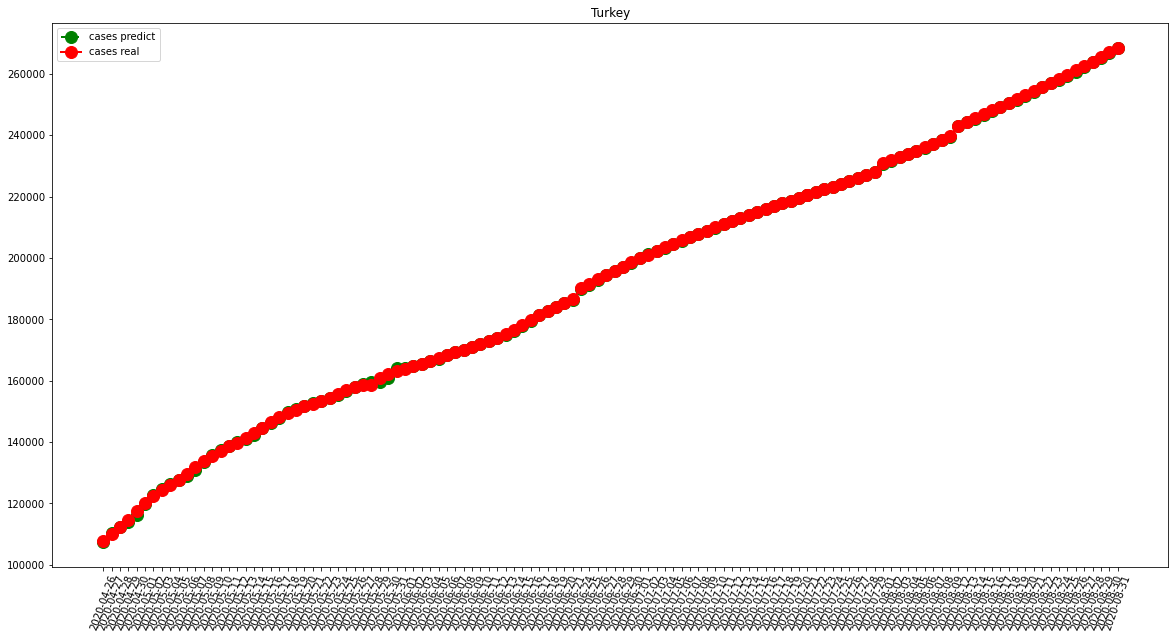

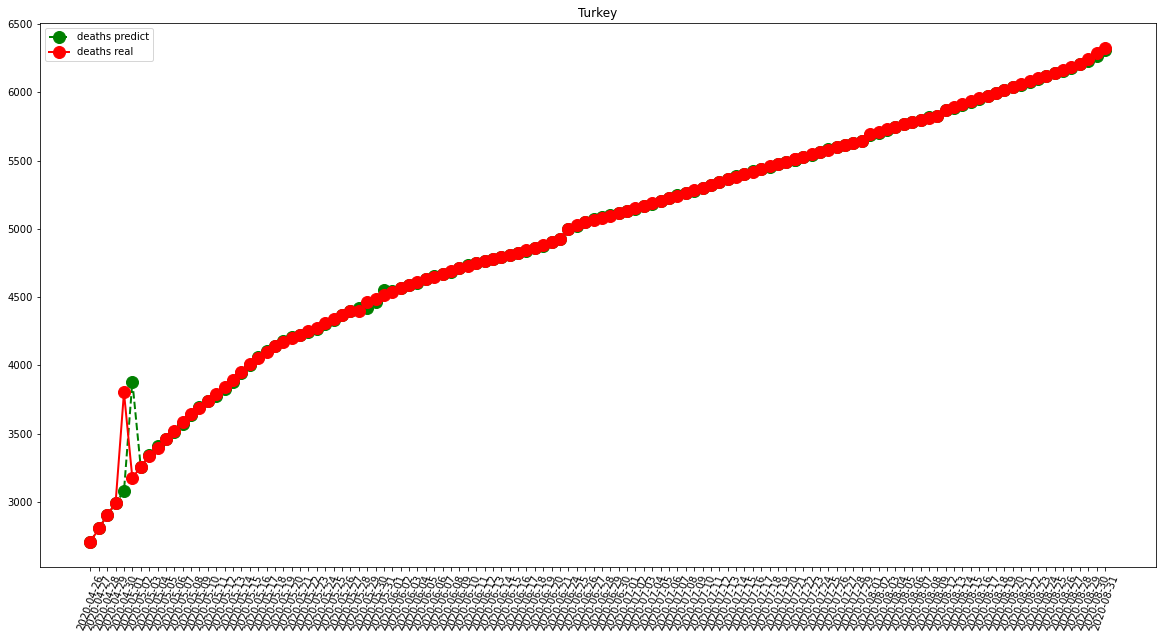

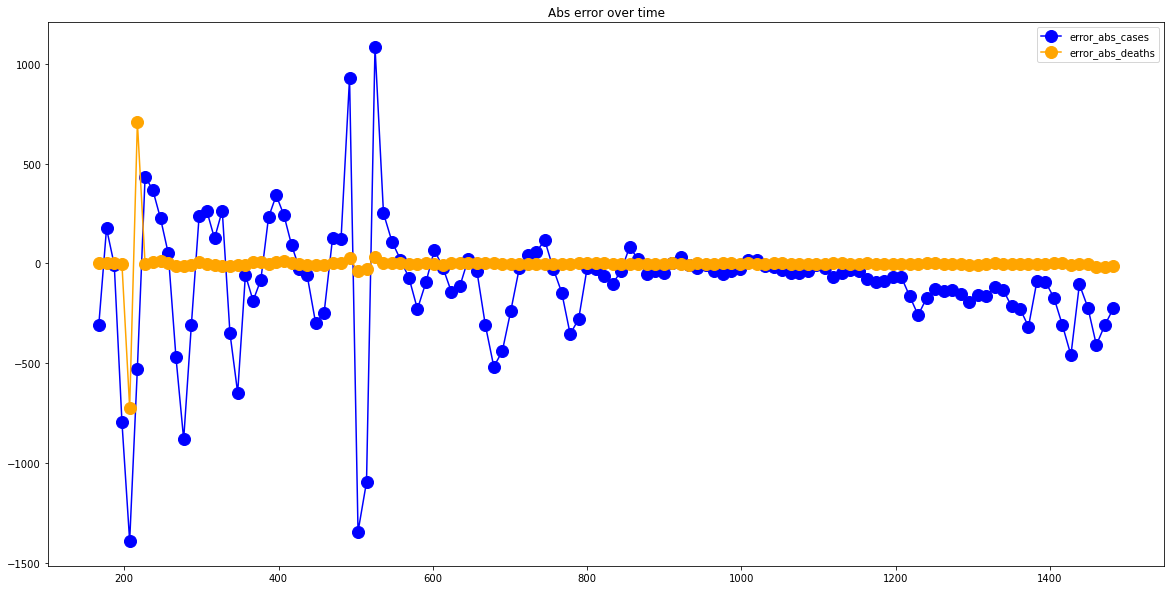

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  13879.28125
RMSE =  18515.977193978088
-- Brazil performances for deaths --
MAE =  432.15625
RMSE =  529.6460787639232


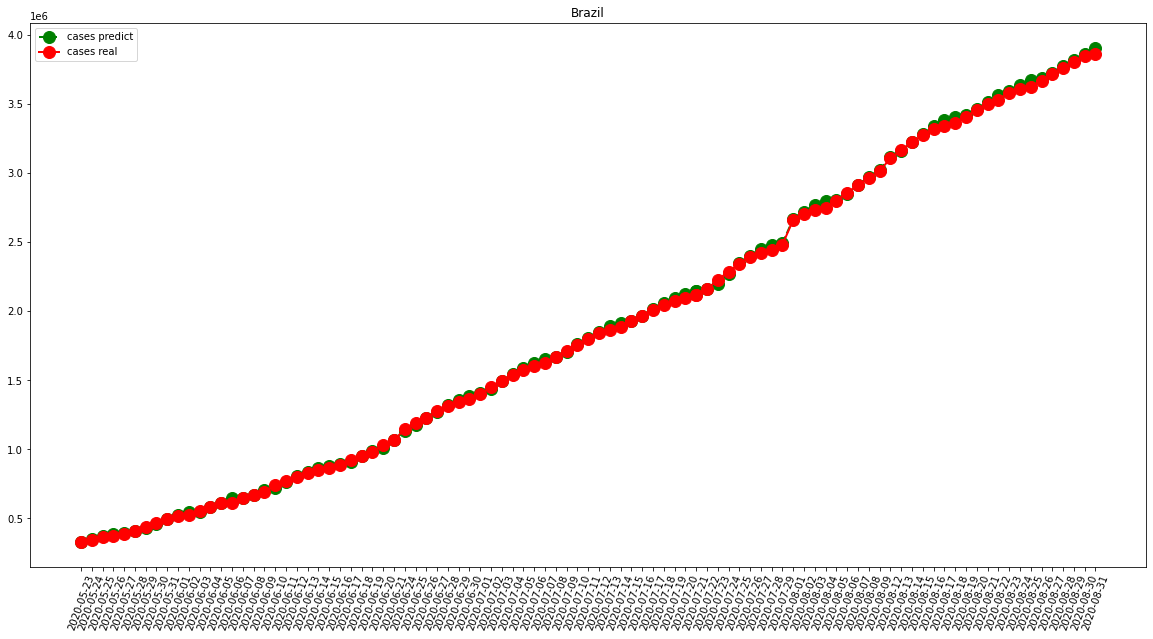

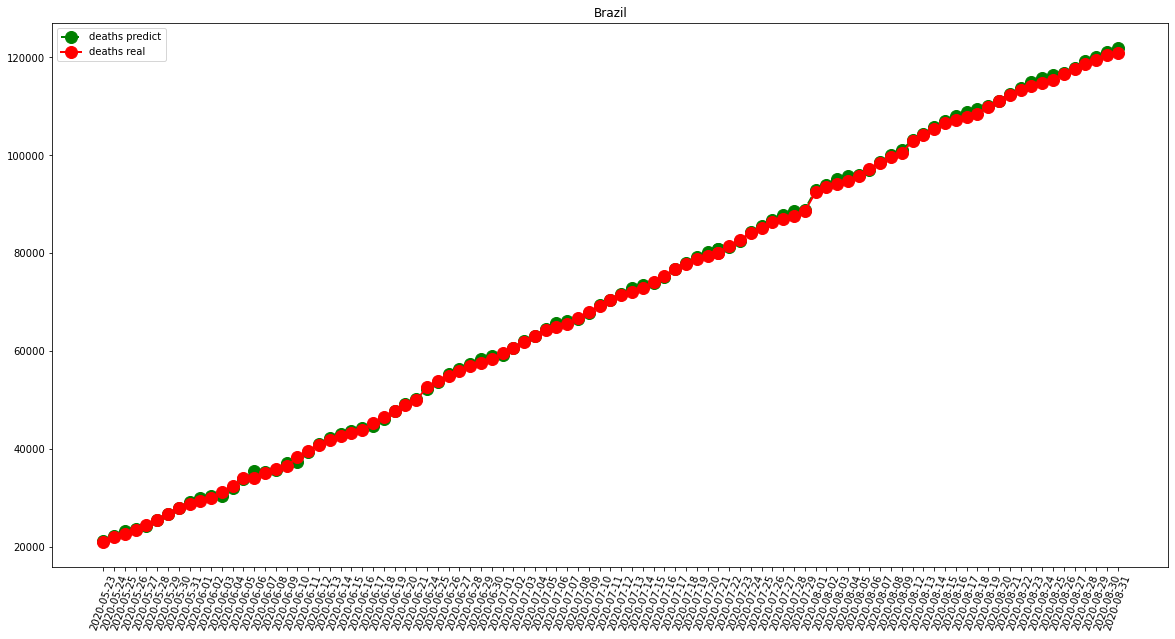

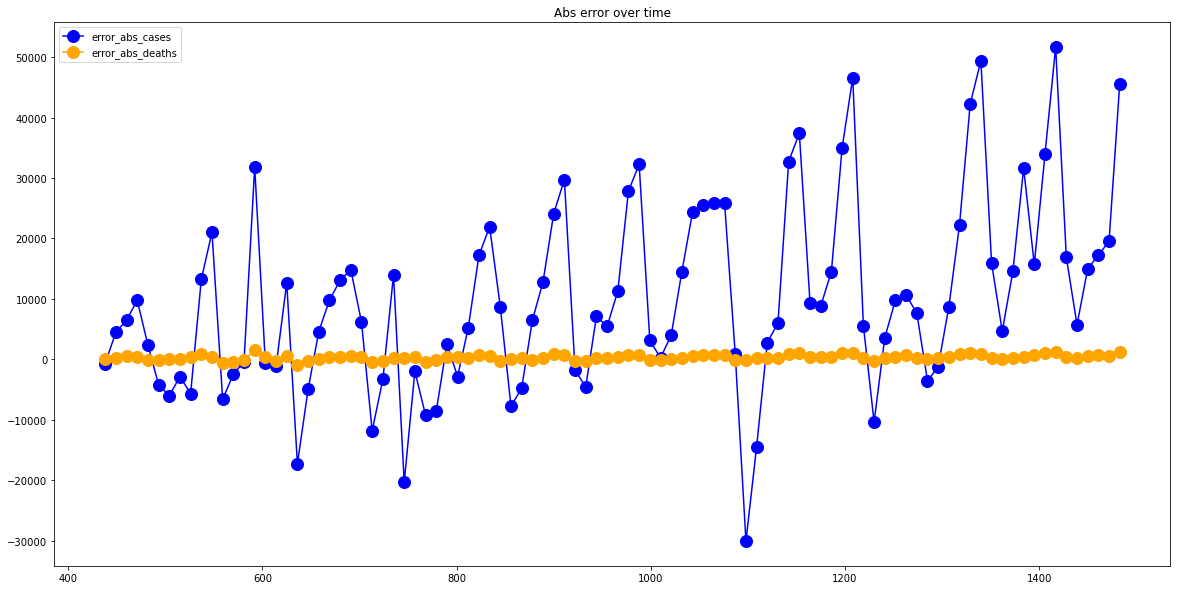

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)